In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
%matplotlib inline

In [2]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_virtual_device_configuration( gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3700)])

In [3]:
tf.__version__

'2.0.1'

In [4]:
tf.test.is_gpu_available()

True

In [5]:
def img_augument(img,lab):
    img = tf.image.random_flip_left_right(img)
#     img = tf.image.random_flip_up_down(img)
    img = tf.image.random_brightness(img, 0.2)
    img = tf.image.random_hue(img,0.1)
    img = tf.image.random_contrast(img, 0.5, 2)
    return img, lab

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()  #50000 train, 10000 test
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [7]:
'''
batch size 
'''

batch_size = 100   ## this is what previous tests are done with
autotune=tf.data.experimental.AUTOTUNE
buffer_size = x_train.shape[0]

In [8]:
category_index=[]     # if want to reduce the training set

for i in range(10):
    index0 = np.where(y_train == i)
    index = index0[0]
    np.random.shuffle(index)
    category_index.append(index)

new_index=[]
for i in range(10):
    new_index.append(category_index[i][0:4000])    
new_index=np.concatenate(new_index)
new_index.shape

(40000,)

In [9]:
augment=False
x_tr=tf.data.Dataset.from_tensor_slices(x_train[new_index])
y_tr=tf.data.Dataset.from_tensor_slices(y_train[new_index])
train_set=tf.data.Dataset.zip((x_tr, y_tr))
if augment==True:
    train_set=train_set.map(img_augument).shuffle(buffer_size,reshuffle_each_iteration=True).repeat().batch(batch_size).prefetch(buffer_size=autotune)
else:
    train_set=train_set.shuffle(buffer_size,reshuffle_each_iteration=True).repeat().batch(batch_size).prefetch(buffer_size=autotune)

In [10]:
# x_te=tf.data.Dataset.from_tensor_slices(x_train[-10000:])
# y_te=tf.data.Dataset.from_tensor_slices(y_train[-10000:])
x_te=tf.data.Dataset.from_tensor_slices(x_test)
y_te=tf.data.Dataset.from_tensor_slices(y_test)
test_set=tf.data.Dataset.zip((x_te, y_te))
test_set=test_set.repeat().batch(200).prefetch(buffer_size=autotune)

In [11]:
from models import ANN_model

model=ANN_model()

In [12]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)

In [13]:
history=model.fit(train_set,
                  epochs=1000,
                  steps_per_epoch=new_index.shape[0]//batch_size,
                  validation_data=test_set,
                  validation_steps=10000//200,
#                   callbacks=[es_callback],
                  verbose=1)


Train for 400 steps, validate for 50 steps
Epoch 1/1000
400/400 [==============================] - 9s 23ms/step - loss: 1.9222 - acc: 0.3205 - val_loss: 1.5865 - val_acc: 0.4408
Epoch 2/1000
400/400 [==============================] - 6s 15ms/step - loss: 1.4026 - acc: 0.4969 - val_loss: 1.2035 - val_acc: 0.5769
Epoch 3/1000
400/400 [==============================] - 6s 15ms/step - loss: 1.1998 - acc: 0.5756 - val_loss: 1.0559 - val_acc: 0.6223
Epoch 4/1000
400/400 [==============================] - 6s 15ms/step - loss: 1.0721 - acc: 0.6239 - val_loss: 0.9823 - val_acc: 0.6595
Epoch 5/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.9738 - acc: 0.6625 - val_loss: 0.8438 - val_acc: 0.7037
Epoch 6/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.9087 - acc: 0.6890 - val_loss: 0.8344 - val_acc: 0.7045
Epoch 7/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.8520 - acc: 0.7066 - val_loss: 0.7333 - val_acc: 0.7447
Epoch 8/1000

Epoch 60/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.2374 - acc: 0.9196 - val_loss: 0.6120 - val_acc: 0.8255
Epoch 61/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.2367 - acc: 0.9196 - val_loss: 0.6496 - val_acc: 0.8146
Epoch 62/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.2330 - acc: 0.9216 - val_loss: 0.6622 - val_acc: 0.8148
Epoch 63/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.2291 - acc: 0.9229 - val_loss: 0.6641 - val_acc: 0.8151
Epoch 64/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.2292 - acc: 0.9207 - val_loss: 0.6254 - val_acc: 0.8203
Epoch 65/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.2308 - acc: 0.9214 - val_loss: 0.6546 - val_acc: 0.8185
Epoch 66/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.2257 - acc: 0.9261 - val_loss: 0.6354 - val_acc: 0.8199
Epoch 67/1000
400/400 [=========================

400/400 [==============================] - 6s 16ms/step - loss: 0.1600 - acc: 0.9471 - val_loss: 0.6924 - val_acc: 0.8225 - ETA: 0s - loss: 0.1610 - acc: 0 - ETA: 0s - loss: 0.1599 - acc: 0.
Epoch 120/1000
400/400 [==============================] - 7s 16ms/step - loss: 0.1584 - acc: 0.9479 - val_loss: 0.6592 - val_acc: 0.8266
Epoch 121/1000
400/400 [==============================] - 7s 16ms/step - loss: 0.1514 - acc: 0.9502 - val_loss: 0.6813 - val_acc: 0.82350s - loss: 0.1513 - - ETA: 0s - loss: 0.1512 - acc: 0.95
Epoch 122/1000
400/400 [==============================] - 7s 16ms/step - loss: 0.1556 - acc: 0.9491 - val_loss: 0.6685 - val_acc: 0.8263
Epoch 123/1000
400/400 [==============================] - 7s 16ms/step - loss: 0.1508 - acc: 0.9503 - val_loss: 0.6770 - val_acc: 0.8243
Epoch 124/1000
400/400 [==============================] - 7s 16ms/step - loss: 0.1447 - acc: 0.9514 - val_loss: 0.6656 - val_acc: 0.8300
Epoch 125/1000
400/400 [==============================] - 6s 16ms/st

400/400 [==============================] - 6s 16ms/step - loss: 0.1213 - acc: 0.9609 - val_loss: 0.6566 - val_acc: 0.8329
Epoch 177/1000
400/400 [==============================] - 7s 16ms/step - loss: 0.1243 - acc: 0.9588 - val_loss: 0.6733 - val_acc: 0.8304
Epoch 178/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.1222 - acc: 0.9598 - val_loss: 0.6627 - val_acc: 0.83141s - loss
Epoch 179/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.1180 - acc: 0.9590 - val_loss: 0.7070 - val_acc: 0.8257
Epoch 180/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.1272 - acc: 0.9584 - val_loss: 0.6630 - val_acc: 0.8325
Epoch 181/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.1219 - acc: 0.9600 - val_loss: 0.7287 - val_acc: 0.8271
Epoch 182/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.1229 - acc: 0.9602 - val_loss: 0.6841 - val_acc: 0.8265
Epoch 183/1000
400/400 [=======================

400/400 [==============================] - 6s 16ms/step - loss: 0.1038 - acc: 0.9658 - val_loss: 0.6762 - val_acc: 0.8342
Epoch 236/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.1033 - acc: 0.9657 - val_loss: 0.7165 - val_acc: 0.8306
Epoch 237/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.1043 - acc: 0.9642 - val_loss: 0.6945 - val_acc: 0.8331
Epoch 238/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.1107 - acc: 0.9641 - val_loss: 0.6971 - val_acc: 0.8304
Epoch 239/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.1067 - acc: 0.9664 - val_loss: 0.6818 - val_acc: 0.8320
Epoch 240/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.1015 - acc: 0.9671 - val_loss: 0.6989 - val_acc: 0.8349
Epoch 241/1000
400/400 [==============================] - 7s 16ms/step - loss: 0.1061 - acc: 0.9651 - val_loss: 0.7111 - val_acc: 0.8317
Epoch 242/1000
400/400 [==============================] 

400/400 [==============================] - 6s 16ms/step - loss: 0.0933 - acc: 0.9705 - val_loss: 0.7001 - val_acc: 0.8345
Epoch 295/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0915 - acc: 0.9695 - val_loss: 0.7172 - val_acc: 0.8301
Epoch 296/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0972 - acc: 0.9679 - val_loss: 0.7188 - val_acc: 0.8294
Epoch 297/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0920 - acc: 0.9706 - val_loss: 0.6985 - val_acc: 0.8359
Epoch 298/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0964 - acc: 0.9690 - val_loss: 0.7016 - val_acc: 0.8321
Epoch 299/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0918 - acc: 0.9700 - val_loss: 0.7167 - val_acc: 0.8276
Epoch 300/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0951 - acc: 0.9694 - val_loss: 0.6934 - val_acc: 0.8324
Epoch 301/1000
400/400 [==============================] 

400/400 [==============================] - 6s 16ms/step - loss: 0.0861 - acc: 0.9728 - val_loss: 0.7443 - val_acc: 0.8316
Epoch 354/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0868 - acc: 0.9714 - val_loss: 0.7037 - val_acc: 0.8340
Epoch 355/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0817 - acc: 0.9735 - val_loss: 0.7385 - val_acc: 0.83543s -  - ETA: 1s - 
Epoch 356/1000
400/400 [==============================] - 7s 16ms/step - loss: 0.0835 - acc: 0.9738 - val_loss: 0.7183 - val_acc: 0.8339
Epoch 357/1000
400/400 [==============================] - 7s 17ms/step - loss: 0.0845 - acc: 0.9721 - val_loss: 0.7405 - val_acc: 0.8295
Epoch 358/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0831 - acc: 0.9736 - val_loss: 0.7165 - val_acc: 0.8311
Epoch 359/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0876 - acc: 0.9716 - val_loss: 0.6902 - val_acc: 0.8358
Epoch 360/1000
400/400 [==============

400/400 [==============================] - 6s 16ms/step - loss: 0.0743 - acc: 0.9758 - val_loss: 0.7656 - val_acc: 0.8272
Epoch 412/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0791 - acc: 0.9752 - val_loss: 0.7319 - val_acc: 0.8311
Epoch 413/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0735 - acc: 0.9762 - val_loss: 0.7626 - val_acc: 0.8329
Epoch 414/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.0750 - acc: 0.9750 - val_loss: 0.7518 - val_acc: 0.8306
Epoch 415/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.0799 - acc: 0.9748 - val_loss: 0.7481 - val_acc: 0.830788 - a - ETA: 0s - loss: 0.0790 - acc: 0
Epoch 416/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.0788 - acc: 0.9750 - val_loss: 0.7188 - val_acc: 0.8342
Epoch 417/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0734 - acc: 0.9756 - val_loss: 0.7363 - val_acc: 0.8330
Epoch 418/1000
4

400/400 [==============================] - 6s 15ms/step - loss: 0.0746 - acc: 0.9765 - val_loss: 0.7344 - val_acc: 0.8348
Epoch 471/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.0695 - acc: 0.9776 - val_loss: 0.7348 - val_acc: 0.8349
Epoch 472/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0727 - acc: 0.9761 - val_loss: 0.7338 - val_acc: 0.8368
Epoch 473/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0727 - acc: 0.9771 - val_loss: 0.7229 - val_acc: 0.8342
Epoch 474/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0746 - acc: 0.9764 - val_loss: 0.7200 - val_acc: 0.8336
Epoch 475/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0746 - acc: 0.9752 - val_loss: 0.7138 - val_acc: 0.8344 - - ETA: 2s - loss: 0.0736 - acc - ETA: 1s - loss: 0.0724 - acc: 0 - ETA: 1s -
Epoch 476/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0751 - acc: 0.9762 - val_loss: 0.

Epoch 526/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0658 - acc: 0.9785 - val_loss: 0.7257 - val_acc: 0.8361
Epoch 527/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0688 - acc: 0.9772 - val_loss: 0.7340 - val_acc: 0.8327
Epoch 528/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0689 - acc: 0.9785 - val_loss: 0.7450 - val_acc: 0.8351 - ETA:
Epoch 529/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0688 - acc: 0.9773 - val_loss: 0.7355 - val_acc: 0.8364
Epoch 530/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0714 - acc: 0.9764 - val_loss: 0.7204 - val_acc: 0.8353
Epoch 531/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0694 - acc: 0.9772 - val_loss: 0.7426 - val_acc: 0.8311
Epoch 532/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0704 - acc: 0.9772 - val_loss: 0.7365 - val_acc: 0.8331
Epoch 533/1000
400/400 [==========

400/400 [==============================] - 6s 16ms/step - loss: 0.0680 - acc: 0.9776 - val_loss: 0.7618 - val_acc: 0.8324
Epoch 585/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0660 - acc: 0.9778 - val_loss: 0.7553 - val_acc: 0.8284
Epoch 586/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0671 - acc: 0.9781 - val_loss: 0.7348 - val_acc: 0.8327
Epoch 587/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0670 - acc: 0.9786 - val_loss: 0.7493 - val_acc: 0.8323
Epoch 588/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0635 - acc: 0.9797 - val_loss: 0.7298 - val_acc: 0.8364
Epoch 589/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0658 - acc: 0.9782 - val_loss: 0.7324 - val_acc: 0.8337
Epoch 590/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0632 - acc: 0.9793 - val_loss: 0.7629 - val_acc: 0.8337oss: 0.0
Epoch 591/1000
400/400 [========================

400/400 [==============================] - 6s 16ms/step - loss: 0.0621 - acc: 0.9805 - val_loss: 0.7312 - val_acc: 0.8361
Epoch 644/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0610 - acc: 0.9814 - val_loss: 0.7345 - val_acc: 0.8321
Epoch 645/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0616 - acc: 0.9795 - val_loss: 0.7410 - val_acc: 0.8329
Epoch 646/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0643 - acc: 0.9788 - val_loss: 0.7403 - val_acc: 0.8322
Epoch 647/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0647 - acc: 0.9796 - val_loss: 0.7142 - val_acc: 0.8365
Epoch 648/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0621 - acc: 0.9805 - val_loss: 0.7294 - val_acc: 0.8345
Epoch 649/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0600 - acc: 0.9811 - val_loss: 0.7283 - val_acc: 0.8350
Epoch 650/1000
400/400 [==============================] 

Epoch 702/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0627 - acc: 0.9800 - val_loss: 0.7606 - val_acc: 0.8362
Epoch 703/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0588 - acc: 0.9812 - val_loss: 0.7418 - val_acc: 0.8380
Epoch 704/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0591 - acc: 0.9800 - val_loss: 0.7701 - val_acc: 0.8316
Epoch 705/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0594 - acc: 0.9805 - val_loss: 0.7559 - val_acc: 0.8315
Epoch 706/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0637 - acc: 0.9804 - val_loss: 0.7497 - val_acc: 0.8358
Epoch 707/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0604 - acc: 0.9814 - val_loss: 0.7365 - val_acc: 0.8348
Epoch 708/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0561 - acc: 0.9819 - val_loss: 0.7659 - val_acc: 0.8368A: 0s - loss: 0.0
Epoch 709/1000
400/400 [

400/400 [==============================] - 6s 16ms/step - loss: 0.0592 - acc: 0.9810 - val_loss: 0.7533 - val_acc: 0.8353
Epoch 762/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0543 - acc: 0.9830 - val_loss: 0.7518 - val_acc: 0.8380
Epoch 763/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0599 - acc: 0.9807 - val_loss: 0.7554 - val_acc: 0.8343
Epoch 764/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0593 - acc: 0.9805 - val_loss: 0.7632 - val_acc: 0.8329
Epoch 765/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0548 - acc: 0.9817 - val_loss: 0.7786 - val_acc: 0.8326
Epoch 766/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0580 - acc: 0.9816 - val_loss: 0.7523 - val_acc: 0.8301
Epoch 767/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0576 - acc: 0.9816 - val_loss: 0.7481 - val_acc: 0.8354
Epoch 768/1000
400/400 [==============================] 

Epoch 820/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0535 - acc: 0.9824 - val_loss: 0.7620 - val_acc: 0.8368
Epoch 821/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0552 - acc: 0.9827 - val_loss: 0.7602 - val_acc: 0.8356
Epoch 822/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.8020 - val_acc: 0.8330
Epoch 823/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0564 - acc: 0.9824 - val_loss: 0.7713 - val_acc: 0.8322
Epoch 824/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0550 - acc: 0.9831 - val_loss: 0.7521 - val_acc: 0.8392
Epoch 825/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0570 - acc: 0.9813 - val_loss: 0.7403 - val_acc: 0.8367
Epoch 826/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0567 - acc: 0.9822 - val_loss: 0.7677 - val_acc: 0.8322
Epoch 827/1000
400/400 [=================

400/400 [==============================] - 6s 16ms/step - loss: 0.0542 - acc: 0.9827 - val_loss: 0.7367 - val_acc: 0.8355
Epoch 880/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0539 - acc: 0.9830 - val_loss: 0.7680 - val_acc: 0.8347
Epoch 881/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0551 - acc: 0.9816 - val_loss: 0.7578 - val_acc: 0.8384
Epoch 882/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0567 - acc: 0.9815 - val_loss: 0.7547 - val_acc: 0.8353
Epoch 883/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.0541 - acc: 0.9832 - val_loss: 0.7545 - val_acc: 0.8361
Epoch 884/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0560 - acc: 0.9825 - val_loss: 0.7639 - val_acc: 0.8388
Epoch 885/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0513 - acc: 0.9829 - val_loss: 0.7664 - val_acc: 0.8368
Epoch 886/1000
400/400 [==============================] 

400/400 [==============================] - 6s 16ms/step - loss: 0.0493 - acc: 0.9841 - val_loss: 0.8103 - val_acc: 0.8348
Epoch 939/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0519 - acc: 0.9831 - val_loss: 0.7745 - val_acc: 0.8371
Epoch 940/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.0538 - acc: 0.9832 - val_loss: 0.7891 - val_acc: 0.8351
Epoch 941/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0518 - acc: 0.9837 - val_loss: 0.7884 - val_acc: 0.8317
Epoch 942/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0495 - acc: 0.9845 - val_loss: 0.7907 - val_acc: 0.8366
Epoch 943/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0543 - acc: 0.9831 - val_loss: 0.7831 - val_acc: 0.8386
Epoch 944/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0538 - acc: 0.9831 - val_loss: 0.7598 - val_acc: 0.8355
Epoch 945/1000
400/400 [==============================] 

400/400 [==============================] - 6s 16ms/step - loss: 0.0482 - acc: 0.9850 - val_loss: 0.7853 - val_acc: 0.8365
Epoch 998/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.0519 - acc: 0.9834 - val_loss: 0.7854 - val_acc: 0.8367
Epoch 999/1000
400/400 [==============================] - 6s 16ms/step - loss: 0.0515 - acc: 0.9837 - val_loss: 0.7572 - val_acc: 0.8351
Epoch 1000/1000
400/400 [==============================] - 6s 15ms/step - loss: 0.0507 - acc: 0.9838 - val_loss: 0.7732 - val_acc: 0.8355


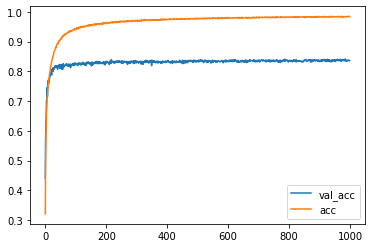

In [14]:
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.legend()

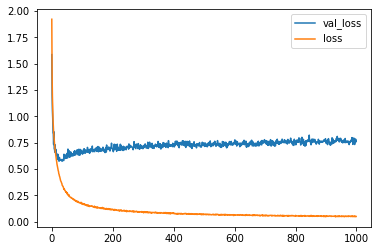

In [15]:
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.legend()

In [16]:
np.array(model.get_weights()).shape

(22,)

In [17]:
epo_h=history.epoch
loss_h=history.history.get('val_loss')
acc_h=history.history.get('val_acc')

arr = np.array([epo_h,loss_h,acc_h])

In [20]:
# filename=os.path.join('result','{}_central.batch{}.es500.npy'.format(new_index.shape[0],batch_size))
# np.save(filename,arr)
# print(filename)

result\40000_central.batch100.es500.npy
